# Guia 1

## 2) Bag Sneppen

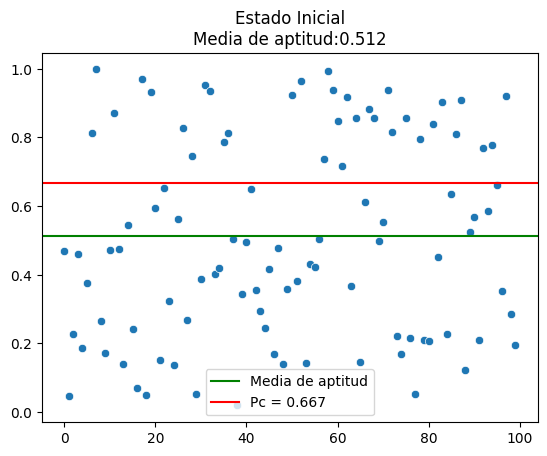

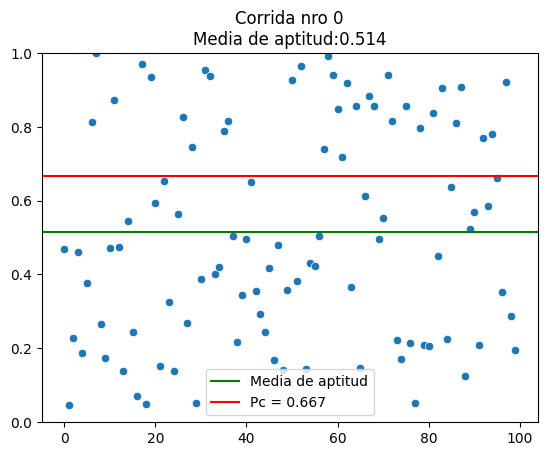

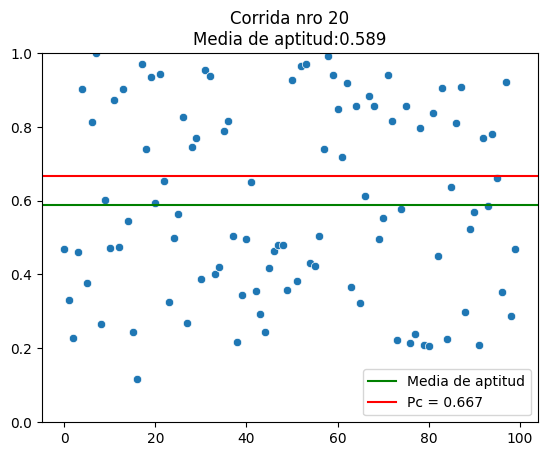

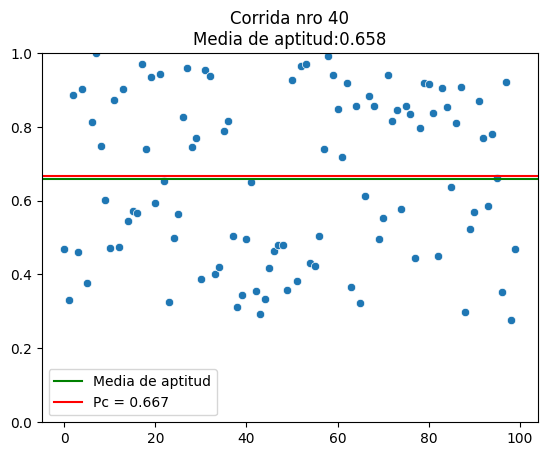

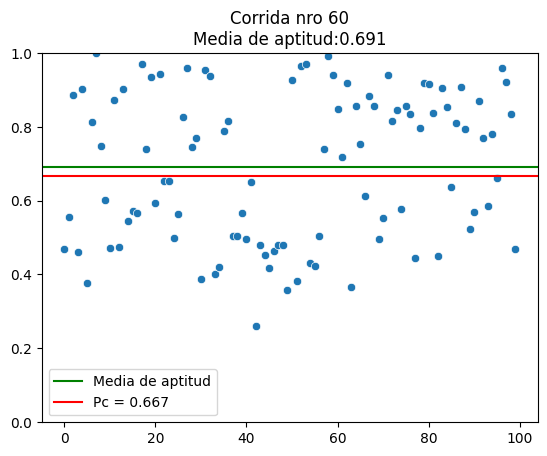

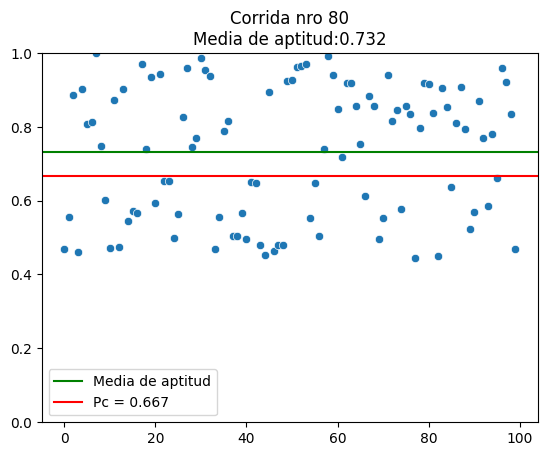

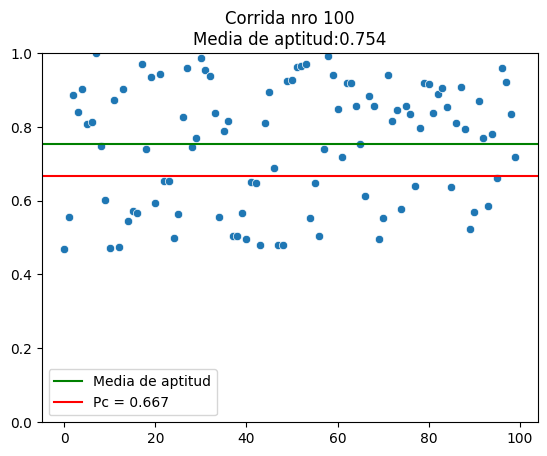

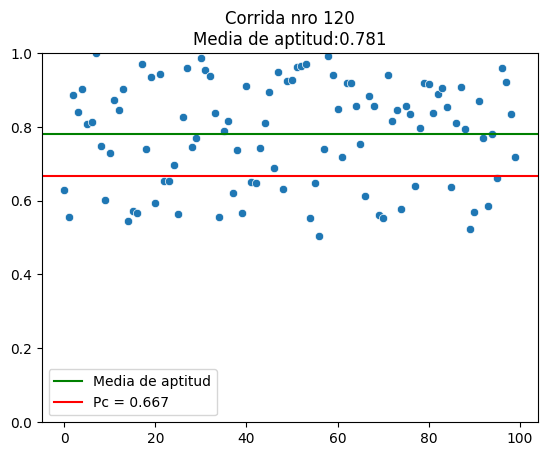

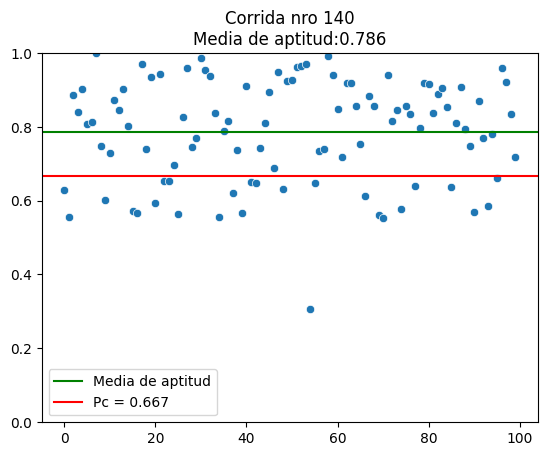

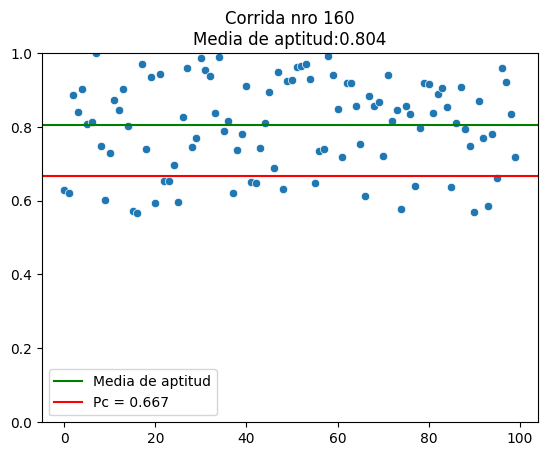

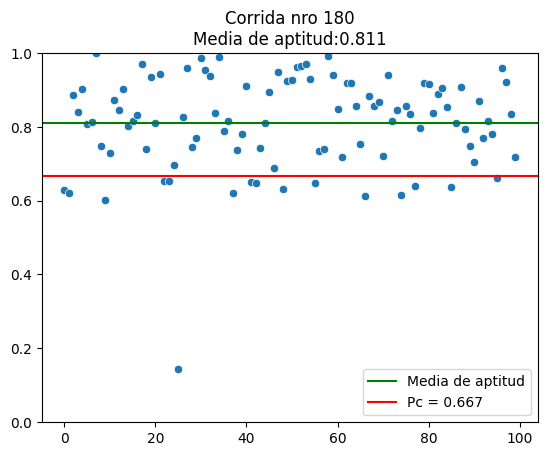

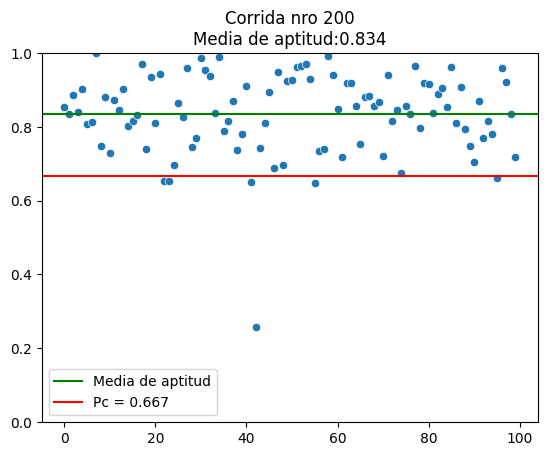

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def bag_sneppen(N=100,time = 200):
    aptitud = np.random.uniform(size=N)

    sns.scatterplot(aptitud)
    plt.title(f'Estado Inicial\nMedia de aptitud:{round(aptitud.mean(),3)}')
    plt.axhline(y = aptitud.mean(), color = 'g', linestyle = '-',label='Media de aptitud')
    plt.axhline(y = 0.667, color = 'r', linestyle = '-',label='Pc = 0.667')
    plt.legend()
    plt.show()

    for i in range(0,time+1):
        aptitud[aptitud == aptitud.min()] = np.random.uniform()
        if i % 20 == 0:
            plt.figure()
            plt.ylim([0, 1])
            plt.title(f'Corrida nro {i}\nMedia de aptitud:{round(aptitud.mean(),3)}')
            sns.scatterplot(aptitud)
            plt.axhline(y = aptitud.mean(), color = 'g', linestyle = '-',label='Media de aptitud')
            plt.axhline(y = 0.667, color = 'r', linestyle = '-',label='Pc = 0.667')
            plt.legend()
            plt.show()


bag_sneppen()

Se puede ver como el fitness promedio va subiendo en medida que pasa el tiempo.

Se puede como los sobrevivientes se acumulan por encima del pcritico: $pc \sim 0.667$

Se observa que la probabilidad de sobrevivir si uno esta por encima del pc es 1 y si uno esta debajo probablemente no sobreviva pasado el tiempo.

# Guia 2

## 1) Una red completa no-dirigida de 50 nodos, ¿cuantos links tiene?

Una red no dirigida de 50 nodos, tiene $49^{49} links$

## 2) ¿Cual es el mınimo numero de links no-dirigidos para un red conexa de N nodos? ¿Que tipo de red (topologıa) es? ¿Todos los nodos tienen la misma cantidad de links?

Para una red no dirigida de N nodos uno debe tener $(N - 1)$ links. El tipo de topologia que tiene es el de una linea.

Para este caso todos tienen la misma cantidad de links.

## 3) En una red conexa de N nodos no-dirigida con forma de anillo, ¿cual es el mınimo numero de links? Y si ahora cada nodo se conecta con su primer vecino y con el segundo, ¿cuantos links tiene la red?

El minimo numero de links que voy a tener es N dado que todos los nodos forman una red conexa pero con el agregado que el final y el inicio estan unidos. Sumandole un link mas $(N - 1) + 1$.

## 4) Construya la matriz de adyacencia de las siguientes dos redes.


A) $\begin{equation} \begin{bmatrix} 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 0 \end{bmatrix} \end{equation}$

B) $\begin{equation} \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix} \end{equation}$

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os
import seaborn as sns
import pandas as pd

## 5) Modelo de Erdos Renyi, G(n, p).

In [113]:
def portion_bc(n=100, n2=1000, two=False, theorical=False):
    prop = []
    mean_degree = []
    vals = []
    for p in np.arange(0, 0.05, 0.001):
        G = nx.erdos_renyi_graph(n=n, p=p, directed=False)
        giantC = len(max(nx.connected_components(G), key=len))
        prop.append(giantC/n)
        mean_degree.append(n*p)
    plt.figure(figsize=(18, 8), dpi=80)
    plt.xlim([0,5])
    plt.xlabel('k=n*p', fontsize=15)
    plt.ylabel('Proporcion en Componente Gigante', fontsize=15)
    sns.lineplot(y=prop,x=mean_degree,label=f'n={n}')
    if two == True:
        prop = []
        mean_degree = []
        for p in np.arange(0, 0.05, 0.001/10):
            G = nx.erdos_renyi_graph(n=n2, p=p, directed=False)
            giantC = len(max(nx.connected_components(G), key=len))
            prop.append(giantC/n2)
            mean_degree.append(n2*p)
        sns.lineplot(x=mean_degree,y=prop,label=f'n={n2}')
    if theorical == True:
        sols = []
        ks = []
        for p in np.arange(0, 0.05, 0.001):
            def fun(x):
                return (1-np.exp(-(n*p)*x)-x)
            sols.append(fsolve(fun,1)[0])
            ks.append(n*p)
        sns.lineplot(x=ks,y=sols,label='Teorico')
        plt.legend()

### A) Fijar la cantidad de nodos en n = 100 y estudiar la proporci´on promedio de nodos que pertenecen a la componente conexa m´as grande en funci´on del n´umero promedio de links que tiene un nodo, k.

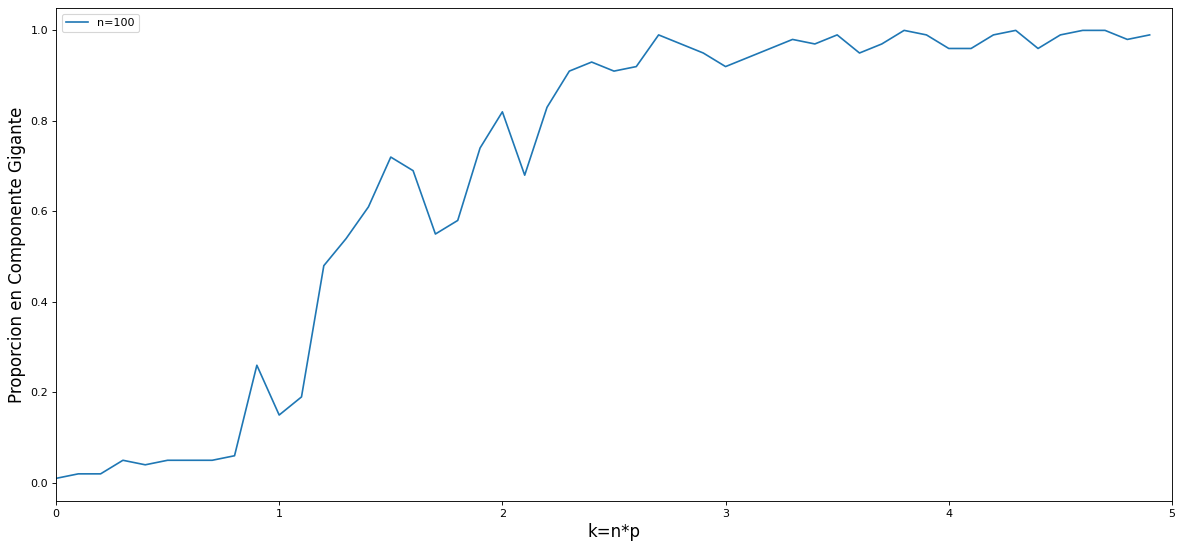

In [114]:
portion_bc(100)

### B) Idem (a) para n=10000. Graficar ambos resultados ((a) y (b)) en un mismo gr´afico. ¿A qu´e converge la curva a medida que n crece?

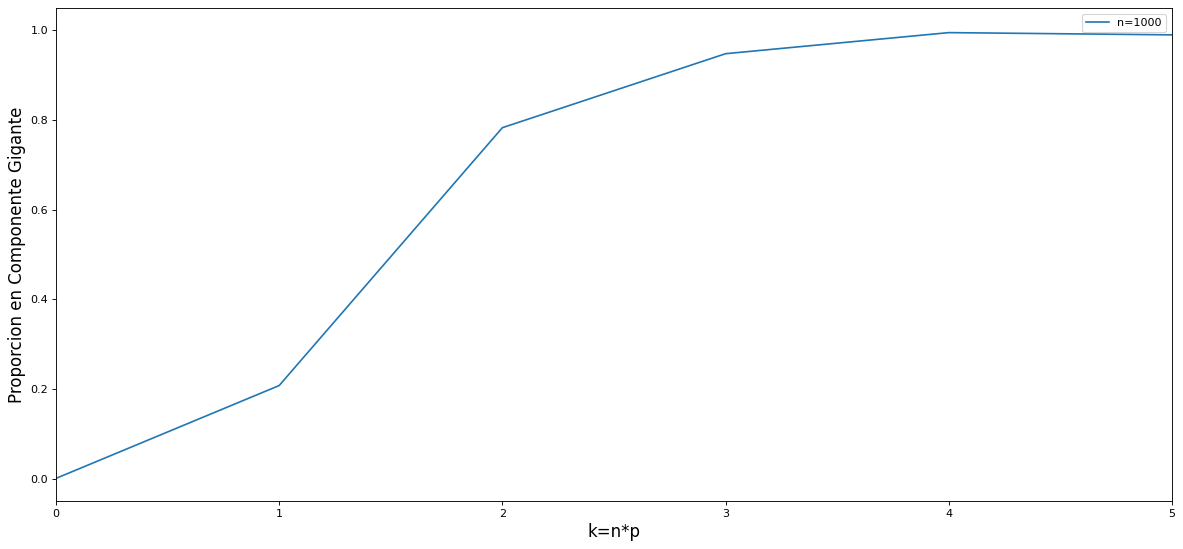

In [115]:
portion_bc(1000)

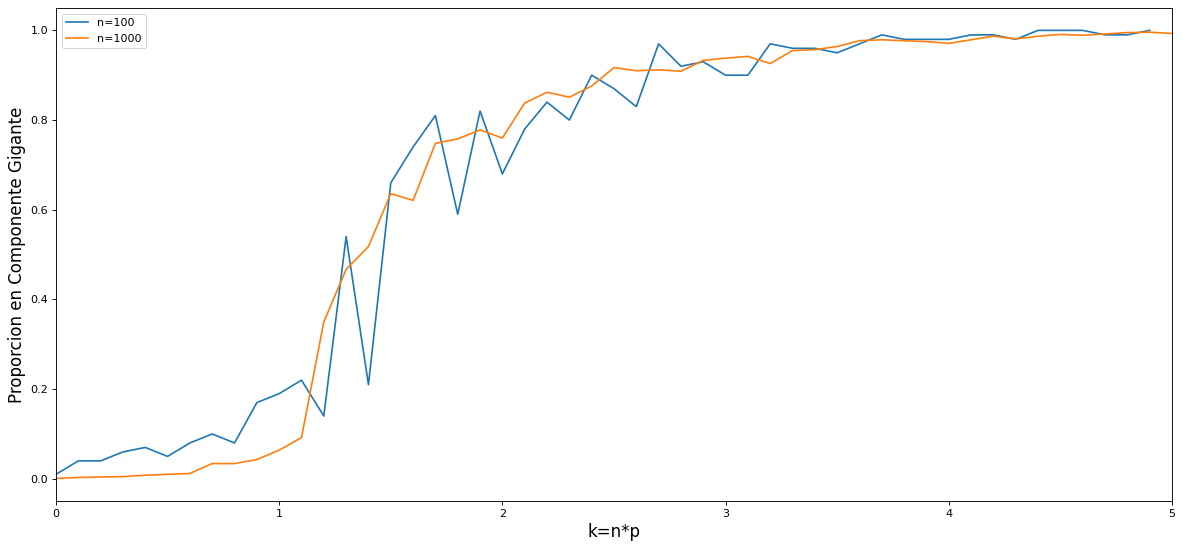

In [116]:
portion_bc(n=100, n2=1000, two=True,theorical=False)

### e) Calcule el valor te´orico y agregar este valor al gr´afico anterior. Explique a qu´e converge el valor teorico

Se puede observar que a K=1 luego de cruzar el punto critico, la curva crece asintoticamente al 1

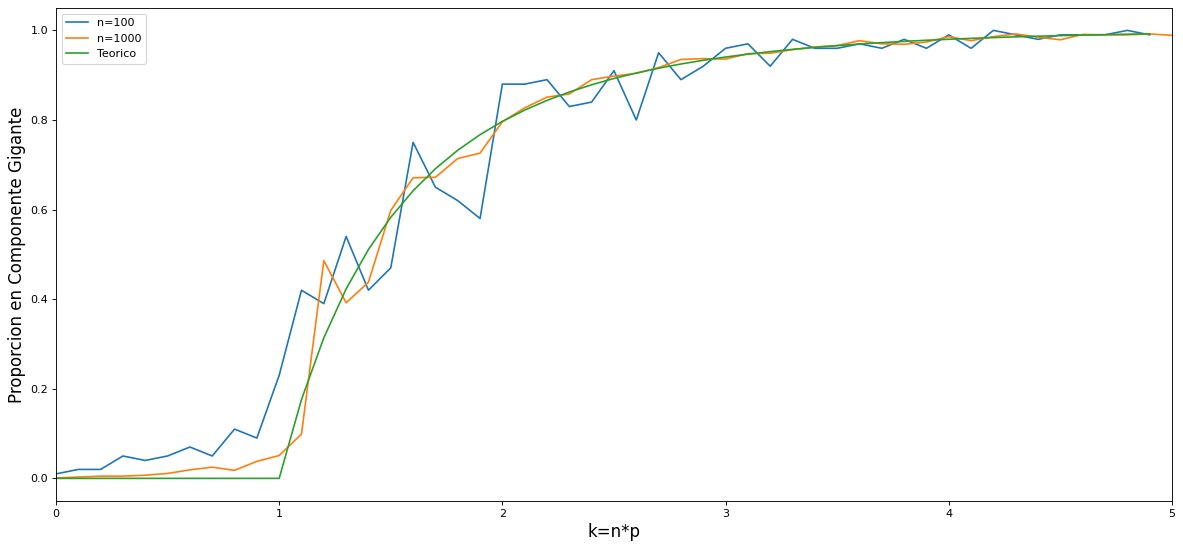

In [117]:
portion_bc(n=100, n2=1000, two=True,theorical=True)

### c) Fijar la cantidad de nodos en n = 100 y estudiar la proporcion promedio de nodos aislados en funcion de k

In [122]:
def portion_out(n=100, n2=None, two=False):
    prop = []
    mean_degree = []
    for p in np.arange(0, 0.05, 0.001):
        G = nx.erdos_renyi_graph(n=n, p=p, directed=False)
        giantC = len(list(nx.isolates(G)))
        prop.append(giantC/n)
        mean_degree.append(n*p)
    plt.figure(figsize=(18, 8), dpi=80)
    plt.xlabel('k=n*p', fontsize=15)
    plt.ylabel('Proporcion de Nodos Aislados', fontsize=15)
    sns.lineplot(x=mean_degree,y=prop,label=f'n={n}')
    if two == True:
        prop = []
        mean_degree = []
        for p in np.arange(0, 0.05/10, 0.001/10):
            G = nx.erdos_renyi_graph(n=n2, p=p, directed=False)
            giantC = len(list(nx.isolates(G)))
            prop.append(giantC/n2)
            mean_degree.append(n2*p)
        sns.lineplot(x=mean_degree,y=prop,label=f'n={n2}')
    plt.legend()

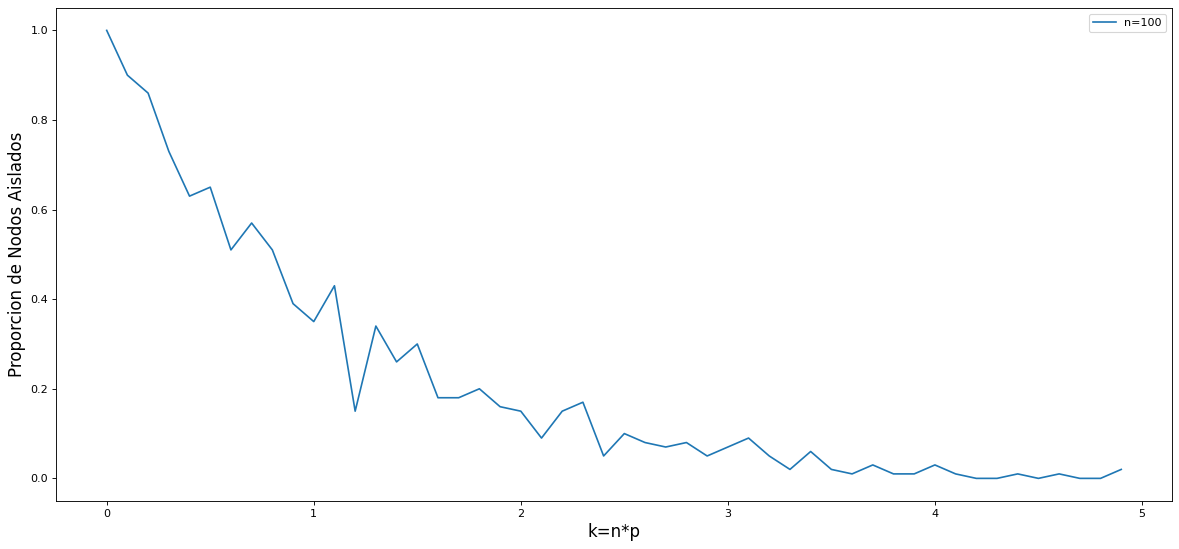

In [123]:
portion_out()

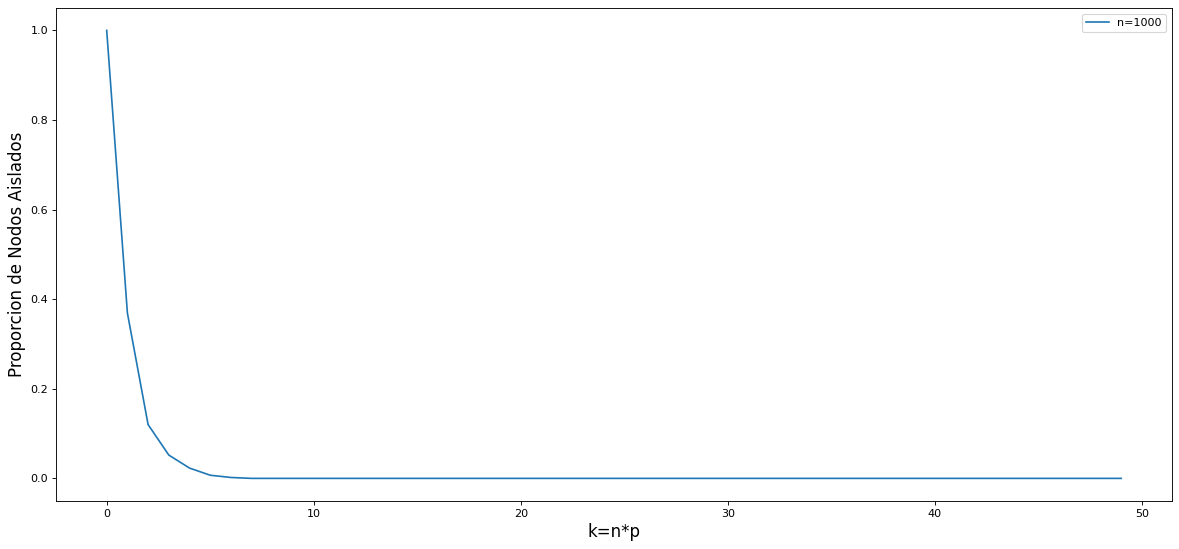

In [124]:
portion_out(n=1000)

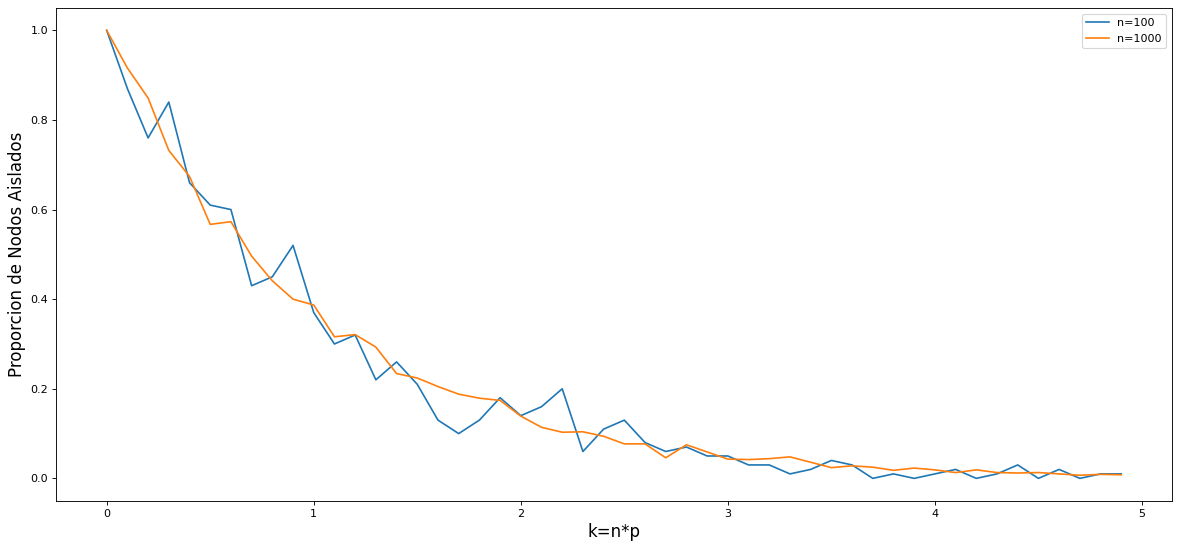

In [125]:
portion_out(100,1000,True)

### f) Fijar la cantidad de nodos en n = 100 y p = 0,01, construir una red y graficarla.

1. Usar un color distinto para cada una de las componentes conexas. Los nodos
de una misma componente se describen con el mismo color.
2. Usar un color distinto para cada uno de los tamaños de las componentes
conexas. Por ejemplo, si la red tiene 40 nodos aislados, y el resto de los nodos
pertenece a una componente, entonces usamos solamente dos colores. Un
color para los 40 nodos aislados y otro color para los nodos de la componente
gigante.


C:\Users\Alan\AppData\Local\Temp\ipykernel_13264\2804300117.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_components)
c:\Users\Alan\.conda\envs\network\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


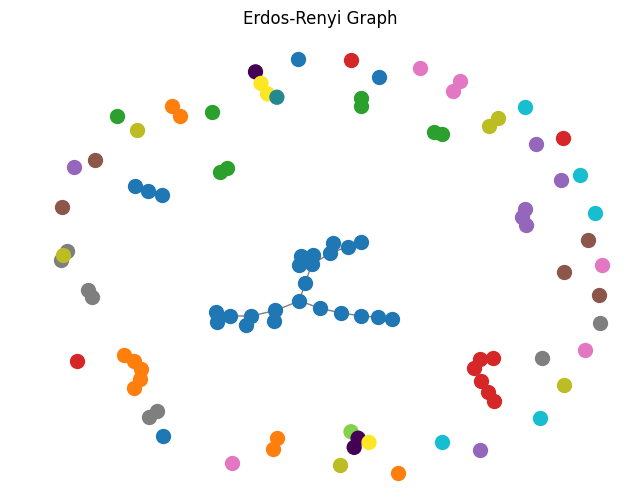

In [18]:
G = nx.binomial_graph(n=100, p=0.01, directed=False)


# Get connected components
components = list(nx.connected_components(G))

# Generate color map for components
num_components = len(components)
colors = plt.cm.get_cmap('tab10', num_components)

# Plot the graph with different colors for each component
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
for i, component in enumerate(components):
    nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=colors(i), node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.title('Erdos-Renyi Graph')
plt.show()

# 6) Abrir los datos de colaboraciones cient´ıficas (collaboration.edgelist.txt) con cualquier editor para saber como es el archivo. 

In [31]:
net = nx.read_edgelist(os.path.join('practica2','collaboration.edgelist.txt'))
print('(a) Nodos:',len(net.nodes))
print('(b) Ejes:',len(net.edges))

(a) Nodos: 23133
(b) Ejes: 93439


# 7) Abrir los datos de colaboraciones de Erdos (Erdos collaboration.dat) con cualquier editor.

In [32]:
g = nx.read_pajek(os.path.join('practica2','Erdos_collaboration.dat'))
print('La cantidad de colaboradores que tuvo erdos es:',len(g.nodes))

La cantidad de colaboradores que tuvo erdos es: 6927


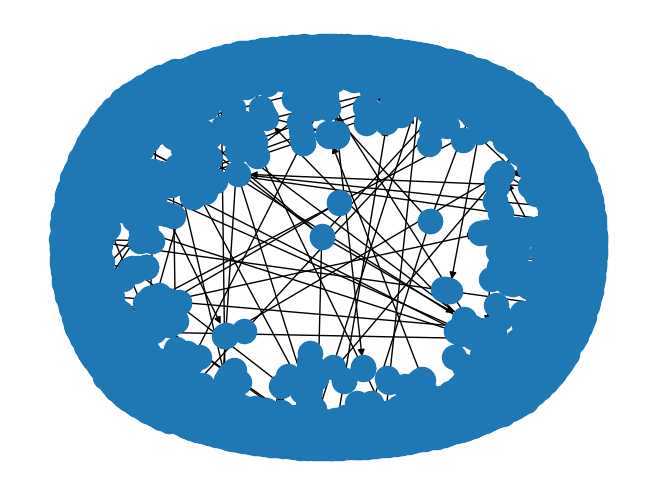

In [33]:
nx.draw(g)

## 8) Paseos aleatorios en la red social de un club de karate universitario (collected by Wayne Zachary).

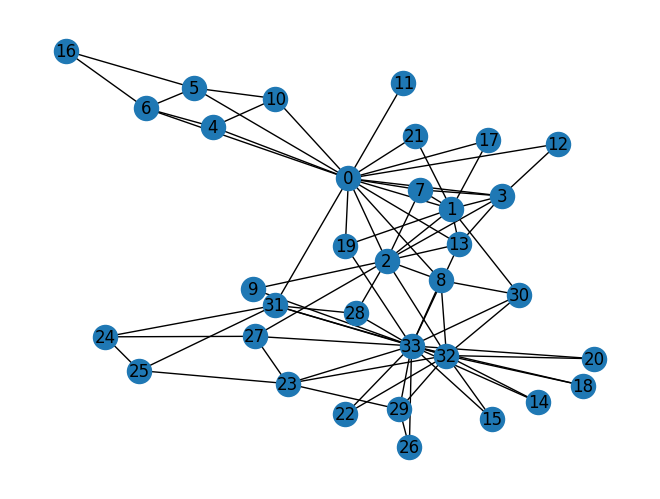

In [19]:
G = nx.read_edgelist(os.path.join('practica2','karate.txt'))

nx.draw(G,with_labels=True)

### a) Definir un estado inicial para el paseo aleatorio, y calcule la probabilidad de que el “borracho” al cabo de 200 pasos temporales se encuentre en cada uno de los nodos, p(200).

Por simplicidad el calculo sera hecho tomando el producto matricial $T$ cantidad de veces para lograr el estado en el paso que se desea.

Para tener una probabilidad debo multiplicar por la matriz S para obtener las probabilidades.

La matriz S es obtenida con la matriz de adyacencias y la Diagonal: $S = AD^{-1}$

Luego debo multiplicar t cantidad de veces por la matriz S para obtener el vector de probabilidades para el paso t: $p(t) = S p(t-1)$ 

In [61]:
n_nodes = G.number_of_nodes()
degrees = dict(G.degree())
D = np.diag(list(degrees.values()))
A = nx.adjacency_matrix(G).A
S = A@np.linalg.inv(D)

p_t = np.zeros((n_nodes, 200))

p_t[0,0] = 1

for t in np.arange(1, 200):
    p_t[:,t] = S@p_t[:, t-1]
    
p_t[:,199]

c:\Users\Alan\.conda\envs\network\Lib\site-packages\scipy\sparse\_base.py:719: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.13.0. Use `.toarray()` instead.
  warn(np.VisibleDeprecationWarning(


array([0.1025641 , 0.05769231, 0.06410256, 0.03846154, 0.01923077,
       0.02564103, 0.02564103, 0.02564103, 0.03205128, 0.01923077,
       0.00641026, 0.01282051, 0.03205128, 0.01282051, 0.01923077,
       0.01282051, 0.03846154, 0.02564103, 0.01282051, 0.02564103,
       0.01923077, 0.07692308, 0.01282051, 0.10897436, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.03205128,
       0.01923077, 0.02564103, 0.01923077, 0.01282051])

### b) Verificar calculando el autovector de autovalor 1 que el estado estacionario corresponde al degree de cada nodo normalizado

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(S)

In [81]:
from tabulate import tabulate

eigenvector_normalized = abs(eigenvectors[:,0] / sum(eigenvectors[:,0]))
totaldegree = sum(dict(G.degree()).values())
degree_normalized = [degree/totaldegree for degree in dict(G.degree()).values()]


table = tabulate([eigenvector_normalized,degree_normalized],tablefmt='fancy_grid')

print(table)

print('Diferencia entre ambos vectores:\n',np.round(eigenvector_normalized,4)-np.round(degree_normalized,4))


╒══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤══════════╤═══════════╤═══════════╤════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╕
│ 0.102564 │ 0.0576923 │ 0.0641026 │ 0.0384615 │ 0.0192308 │ 0.025641 │ 0.025641 │ 0.025641 │ 0.0320513 │ 0.0192308 │ 0.00641026 │ 0.0128205 │ 0.0320513 │ 0.0128205 │ 0.0192308 │ 0.0128205 │ 0.0384615 │ 0.025641 │ 0.0128205 │ 0.025641 │ 0.0192308 │ 0.0769231 │ 0.0128205 │ 0.108974 │ 0.0128205 │ 0.0128205 │ 0.0128205 │ 0.0128205 │ 0.0128205 │ 0.0320513 │ 0.0192308 │ 0.025641 │ 0.0192308 │ 0.0128205 │
├──────────┼───────────┼───────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼───────────┼────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────